In [1]:
# --- Imports ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Initial EDA

In [3]:
train_data.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


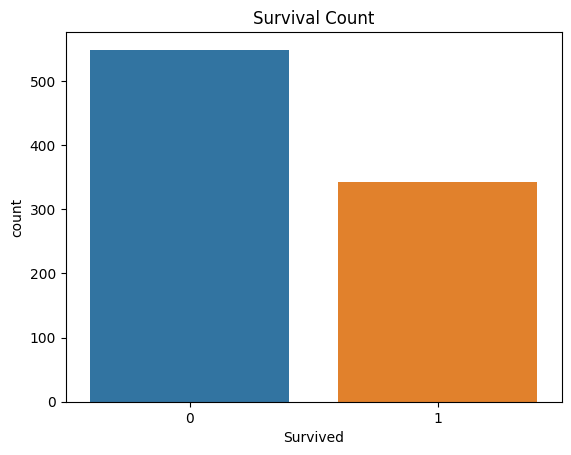

In [6]:
# Target distribution
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

In [7]:
# Survival rate by Pclass
train_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [8]:
# Survival rate by Sex
train_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

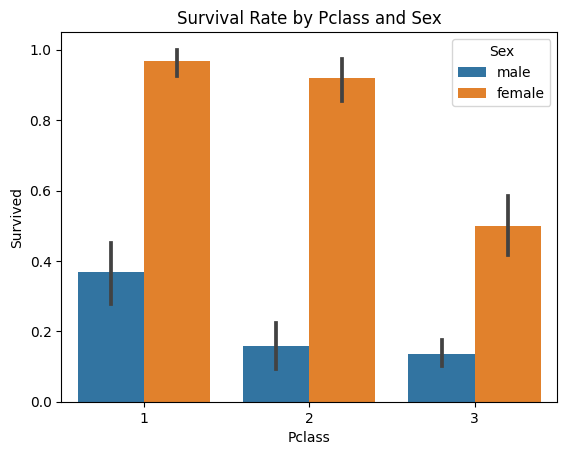

In [9]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data)
plt.title('Survival Rate by Pclass and Sex')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


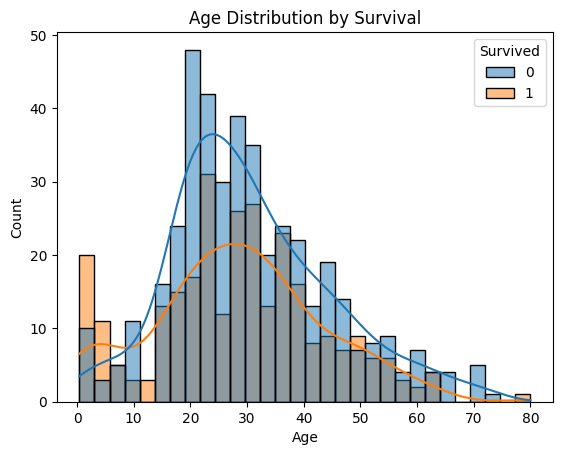

In [10]:
sns.histplot(data=train_data, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()


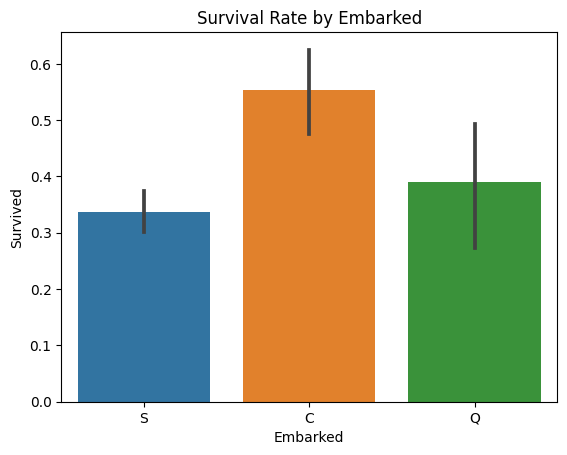

In [11]:
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked')
plt.show()


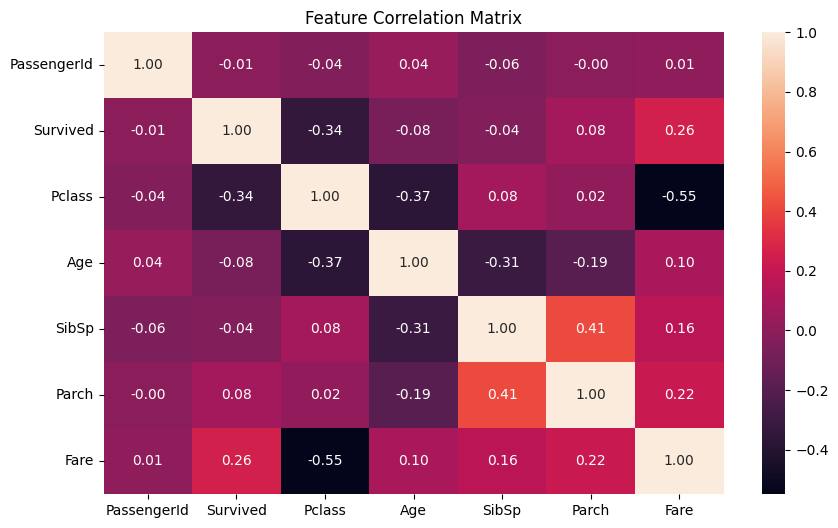

In [12]:
# Focus only on numeric columns for correlation
numeric_features = train_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_features.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Data Cleaning

In [13]:
# --- Data Cleaning ---
for df in [train_data, test_data]:
    # Fill missing Age by Pclass-Sex median
    df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    # Fill missing Embarked with mode
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    # Encode categorical features
    df['Sex'] = pd.factorize(df['Sex'])[0]
    df['Embarked'] = pd.factorize(df['Embarked'])[0]

# Feature Engineering

In [14]:
# --- Feature Engineering ---
for df in [train_data, test_data]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['Age*Pclass'] = df['Age'] * df['Pclass']
    df['Age*FamilySize'] = df['Age'] * df['FamilySize']
    df['Age*Sex'] = df['Age'] * df['Sex']

# Focused EDA

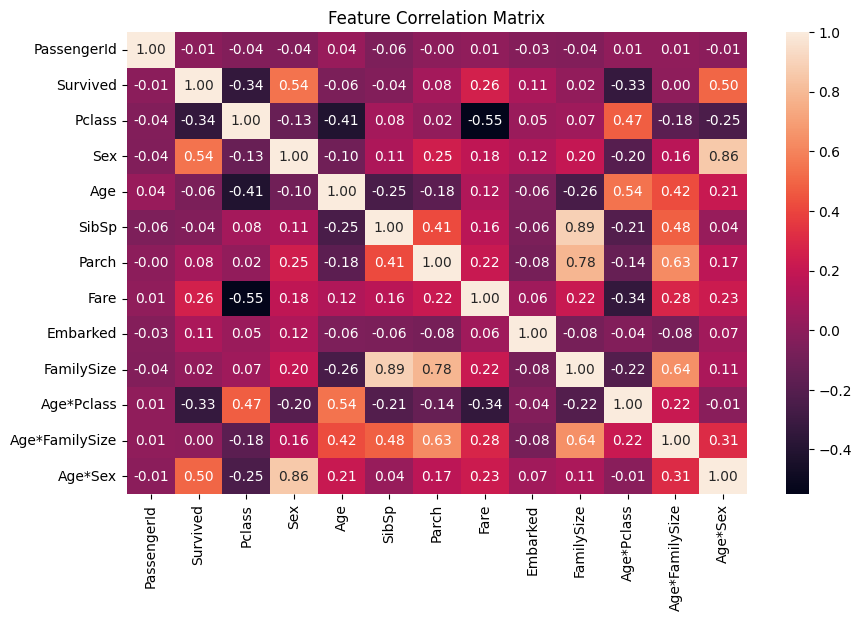

In [15]:
# Check correlations
# Focus only on numeric columns for correlation
numeric_features = train_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_features.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


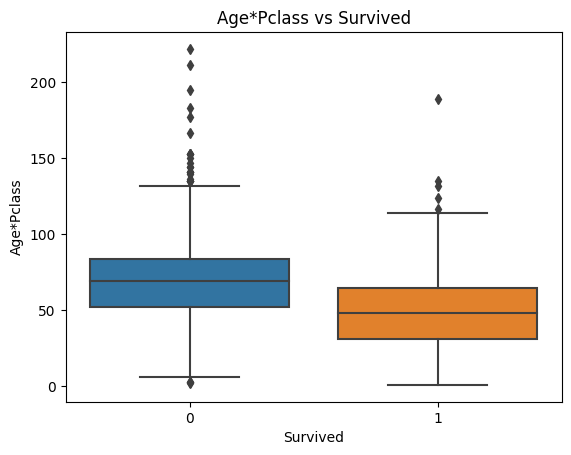

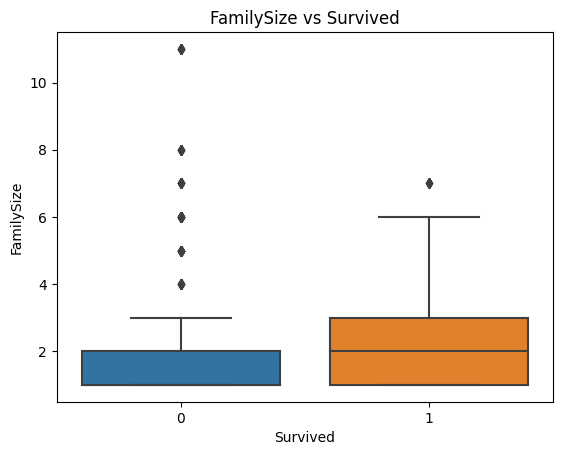

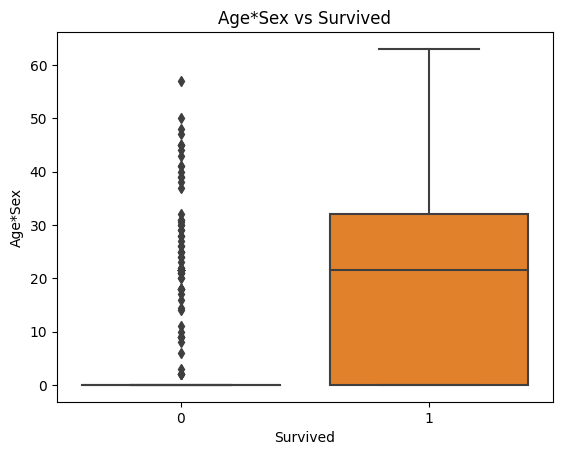

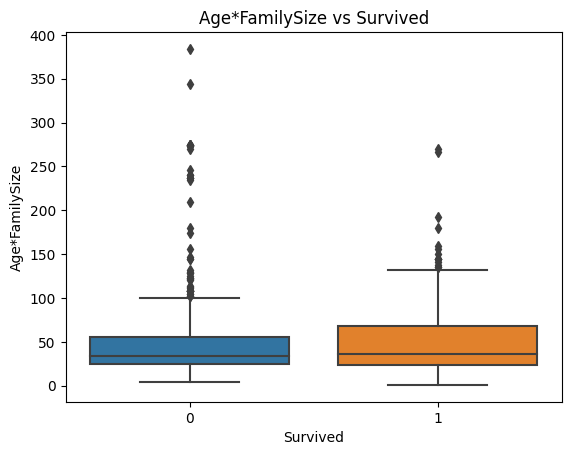

In [16]:
# Feature distributions vs target
engineered_features = ['Age*Pclass','FamilySize','Age*Sex', 'Age*FamilySize']
for feature in engineered_features:
    sns.boxplot(x='Survived', y=feature, data=train_data)
    plt.title(f'{feature} vs Survived')
    plt.show()

# Modeling

In [17]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Age*Pclass','FamilySize', 'Age*Sex', 'Embarked']
X = train_data[features]
y = train_data['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Age*Pclass,FamilySize,Age*Sex,Embarked
0,3,0,22.0,1,0,66.0,2,0.0,0
1,1,1,38.0,1,0,38.0,2,38.0,1
2,3,1,26.0,0,0,78.0,1,26.0,0
3,1,1,35.0,1,0,35.0,2,35.0,0
4,3,0,35.0,0,0,105.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,54.0,1,0.0,0
887,1,1,19.0,0,0,19.0,1,19.0,0
888,3,1,21.5,1,2,64.5,4,21.5,0
889,1,0,26.0,0,0,26.0,1,0.0,1


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Age*Pclass  891 non-null    float64
 6   FamilySize  891 non-null    int64  
 7   Age*Sex     891 non-null    float64
 8   Embarked    891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [19]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Age*Pclass,FamilySize,Age*Sex,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.112424,0.523008,0.381594,62.614860,1.904602,9.607183,0.361392
std,0.836071,0.477990,13.304424,1.102743,0.806057,31.362024,1.613459,15.174227,0.635673
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.920000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,21.500000,0.000000,0.000000,40.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,26.000000,0.000000,0.000000,63.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,75.000000,2.000000,21.500000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,222.000000,11.000000,63.000000,2.000000


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
model = HistGradientBoostingClassifier(
    max_iter=200,       # default 100; slightly more gives stability
    max_depth=3,        # simple tree depth
    learning_rate=0.1,  # default
    random_state=42
)

In [22]:
model.fit(X_train, y_train)
pred = model.predict(X_val)
acc = accuracy_score(y_val, pred)
print('Validation Accuracy: ', acc)

Validation Accuracy:  0.8491620111731844


# Predict Test Data

In [23]:
model.fit(X, y)
pred = model.predict(test_data[features])

In [24]:
output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived' : pred})
output.to_csv('submission.csv', index = False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
